In [94]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

# Preview the data
print(df.head())



   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2 

In [96]:
# Check the shape of the dataset (rows and columns)
df.shape

(1925, 231)

In [97]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [98]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

print(df.isnull().sum())

PATIENT_VISIT_IDENTIFIER               0
AGE_ABOVE65                            0
AGE_PERCENTIL                          0
GENDER                                 0
DISEASE GROUPING 1                     5
DISEASE GROUPING 2                     5
DISEASE GROUPING 3                     5
DISEASE GROUPING 4                     5
DISEASE GROUPING 5                     5
DISEASE GROUPING 6                     5
HTN                                    5
IMMUNOCOMPROMISED                      5
OTHER                                  5
ALBUMIN_MEDIAN                      1104
ALBUMIN_MEAN                        1104
ALBUMIN_MIN                         1104
ALBUMIN_MAX                         1104
ALBUMIN_DIFF                        1104
BE_ARTERIAL_MEDIAN                  1104
BE_ARTERIAL_MEAN                    1104
BE_ARTERIAL_MIN                     1104
BE_ARTERIAL_MAX                     1104
BE_ARTERIAL_DIFF                    1104
BE_VENOUS_MEDIAN                    1104
BE_VENOUS_MEAN  

In [100]:
# Calculate missing values count and percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_summary)

                                  Missing Count  Missing Percentage
ALBUMIN_MAX                                1104           57.350649
ALBUMIN_DIFF                               1104           57.350649
BE_ARTERIAL_MEDIAN                         1104           57.350649
BE_ARTERIAL_MEAN                           1104           57.350649
BE_ARTERIAL_MIN                            1104           57.350649
ALBUMIN_MEAN                               1104           57.350649
ALBUMIN_MEDIAN                             1104           57.350649
BIC_ARTERIAL_MAX                           1104           57.350649
BIC_ARTERIAL_DIFF                          1104           57.350649
BIC_VENOUS_MEDIAN                          1104           57.350649
BIC_VENOUS_MEAN                            1104           57.350649
BIC_VENOUS_MIN                             1104           57.350649
BIC_VENOUS_MAX                             1104           57.350649
BIC_ARTERIAL_MEAN                          1104 

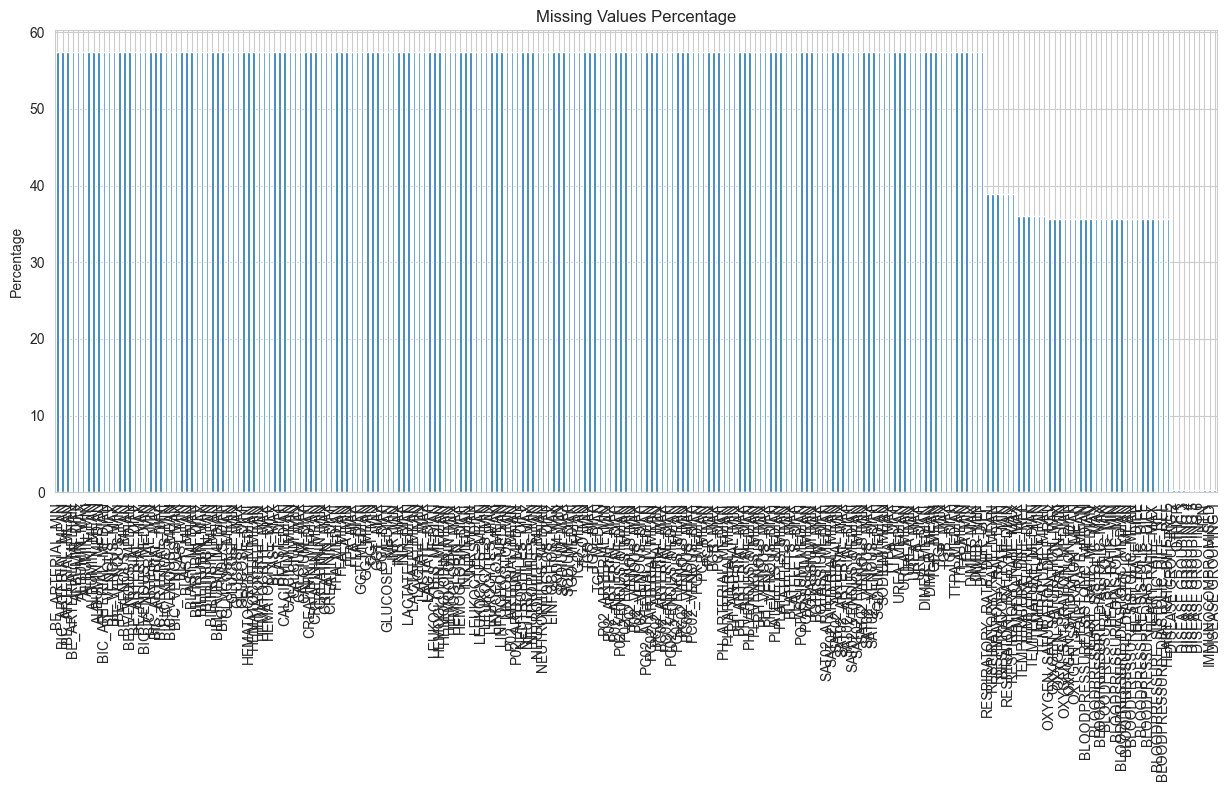

In [101]:
# Check missing values percentage for all columns
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))
plt.title("Missing Values Percentage")
plt.ylabel("Percentage")
plt.show()

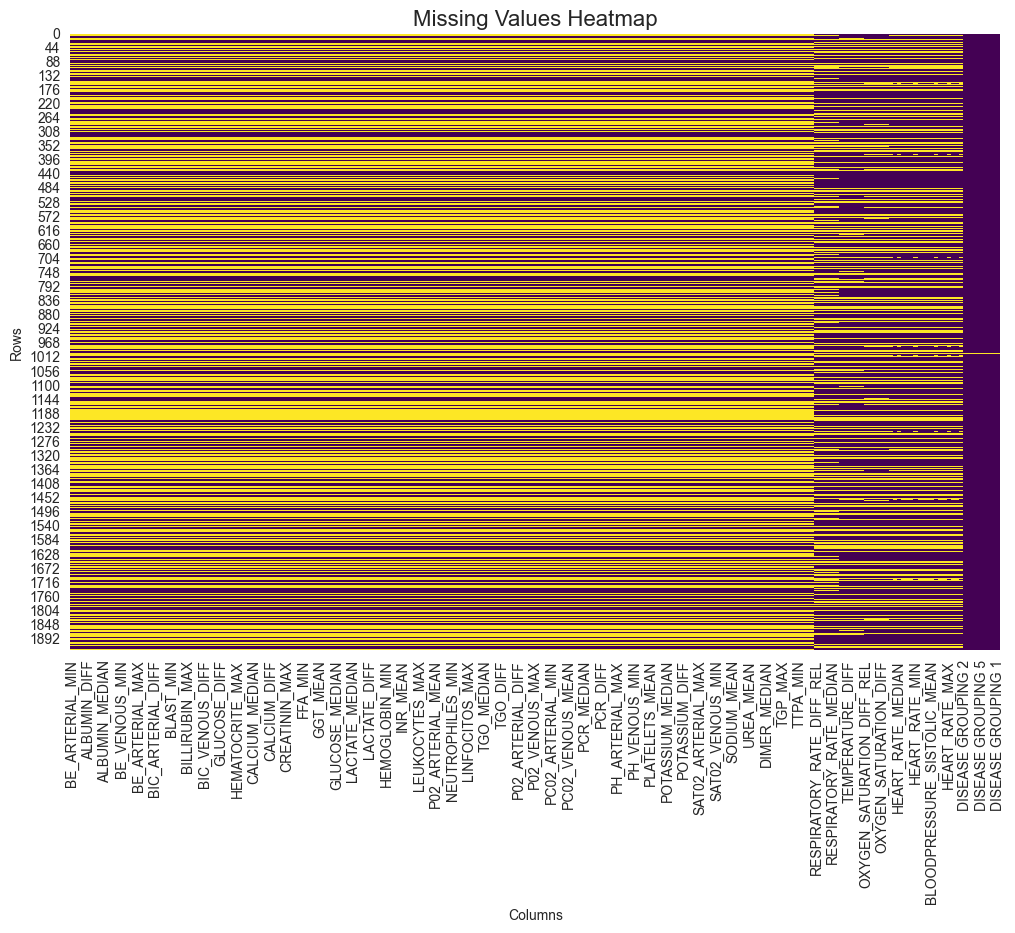

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
missing_cols = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df[missing_cols.index].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [58]:
''' At first I wanted to drop the columns with more than 65% missing values and I wrote the code but then I did research and 
I decided to use different aproach because thatcould lead to the loss of potentially useful features if the missing data isn't handled carefully.

# Calculate the percentage of missing values in each column after imputation
missing_percentage = df_cleaned.isnull().mean() * 100

# Identify columns where more than 65% of the values are missing
columns_to_drop = missing_percentage[missing_percentage > 65].index

# Drop those columns from the dataframe
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Check which columns were dropped
print(f"Columns dropped due to more than 65% missing values: {columns_to_drop}")
print("\nRemaining columns:")
print(df_cleaned.columns) '''


In [103]:
# Drop rows where the target variable ('ICU') has missing values.
# This ensures that we only work with rows where we know whether the patient was admitted to the ICU, 
# which is critical for the model's predictions. Removing rows with missing target values helps avoid bias in the model.
df_cleaned = df.dropna(subset=['ICU'])

# Impute missing values in numerical columns (columns with 'int64' or 'float64' data types).
# Missing numerical data is replaced with the median value of each column. The median is a robust statistic 
# and works well for handling outliers, as it is less sensitive than the mean. This approach helps maintain 
# the distribution of numerical data without introducing significant bias.
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

# Impute missing values in categorical columns (columns with 'object' data types).
# For categorical data, we replace missing values with the most frequent value (mode) in each column. 
# Using the mode ensures that the imputation is based on the most common category, which is a reasonable assumption 
# when we don't have enough data for a particular category. This prevents losing rows with incomplete categorical data.
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Check if there are any remaining missing values in the dataset after imputation.
# This step helps to ensure that our imputation process has successfully filled all the missing values.
# If there are any missing values left, we may need to investigate further or apply additional imputation strategies.
df_cleaned.isnull().sum()



PATIENT_VISIT_IDENTIFIER            0
AGE_ABOVE65                         0
AGE_PERCENTIL                       0
GENDER                              0
DISEASE GROUPING 1                  0
DISEASE GROUPING 2                  0
DISEASE GROUPING 3                  0
DISEASE GROUPING 4                  0
DISEASE GROUPING 5                  0
DISEASE GROUPING 6                  0
HTN                                 0
IMMUNOCOMPROMISED                   0
OTHER                               0
ALBUMIN_MEDIAN                      0
ALBUMIN_MEAN                        0
ALBUMIN_MIN                         0
ALBUMIN_MAX                         0
ALBUMIN_DIFF                        0
BE_ARTERIAL_MEDIAN                  0
BE_ARTERIAL_MEAN                    0
BE_ARTERIAL_MIN                     0
BE_ARTERIAL_MAX                     0
BE_ARTERIAL_DIFF                    0
BE_VENOUS_MEDIAN                    0
BE_VENOUS_MEAN                      0
BE_VENOUS_MIN                       0
BE_VENOUS_MA

In [104]:
# Check missing values in specific columns
columns_with_nan = ['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 
                    'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL']

print(df_cleaned[columns_with_nan].isnull().sum())


TEMPERATURE_DIFF                    0
OXYGEN_SATURATION_DIFF              0
BLOODPRESSURE_DIASTOLIC_DIFF_REL    0
HEART_RATE_DIFF_REL                 0
RESPIRATORY_RATE_DIFF_REL           0
dtype: int64


In [105]:
print(df_cleaned.describe())

       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1925.000000   
mean                 192.000000     0.467532     0.368831            0.108052   
std                  111.168431     0.499074     0.482613            0.310527   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1925.000000         1925.000000         1925.000000   
mean             0.028052            0.097662            0.019740   
std              0.165164            0.296935            0.1391

In [106]:
#investigated if everything was cleaned 
print(df_cleaned[df_cleaned['BLOODPRESSURE_DIASTOLIC_DIFF_REL'] == 'NaN'])

Empty DataFrame
Columns: [PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, ALBUMIN_MAX, ALBUMIN_DIFF, BE_ARTERIAL_MEDIAN, BE_ARTERIAL_MEAN, BE_ARTERIAL_MIN, BE_ARTERIAL_MAX, BE_ARTERIAL_DIFF, BE_VENOUS_MEDIAN, BE_VENOUS_MEAN, BE_VENOUS_MIN, BE_VENOUS_MAX, BE_VENOUS_DIFF, BIC_ARTERIAL_MEDIAN, BIC_ARTERIAL_MEAN, BIC_ARTERIAL_MIN, BIC_ARTERIAL_MAX, BIC_ARTERIAL_DIFF, BIC_VENOUS_MEDIAN, BIC_VENOUS_MEAN, BIC_VENOUS_MIN, BIC_VENOUS_MAX, BIC_VENOUS_DIFF, BILLIRUBIN_MEDIAN, BILLIRUBIN_MEAN, BILLIRUBIN_MIN, BILLIRUBIN_MAX, BILLIRUBIN_DIFF, BLAST_MEDIAN, BLAST_MEAN, BLAST_MIN, BLAST_MAX, BLAST_DIFF, CALCIUM_MEDIAN, CALCIUM_MEAN, CALCIUM_MIN, CALCIUM_MAX, CALCIUM_DIFF, CREATININ_MEDIAN, CREATININ_MEAN, CREATININ_MIN, CREATININ_MAX, CREATININ_DIFF, FFA_MEDIAN, FFA_MEAN, FFA_MIN, FFA_MAX, FFA_DI

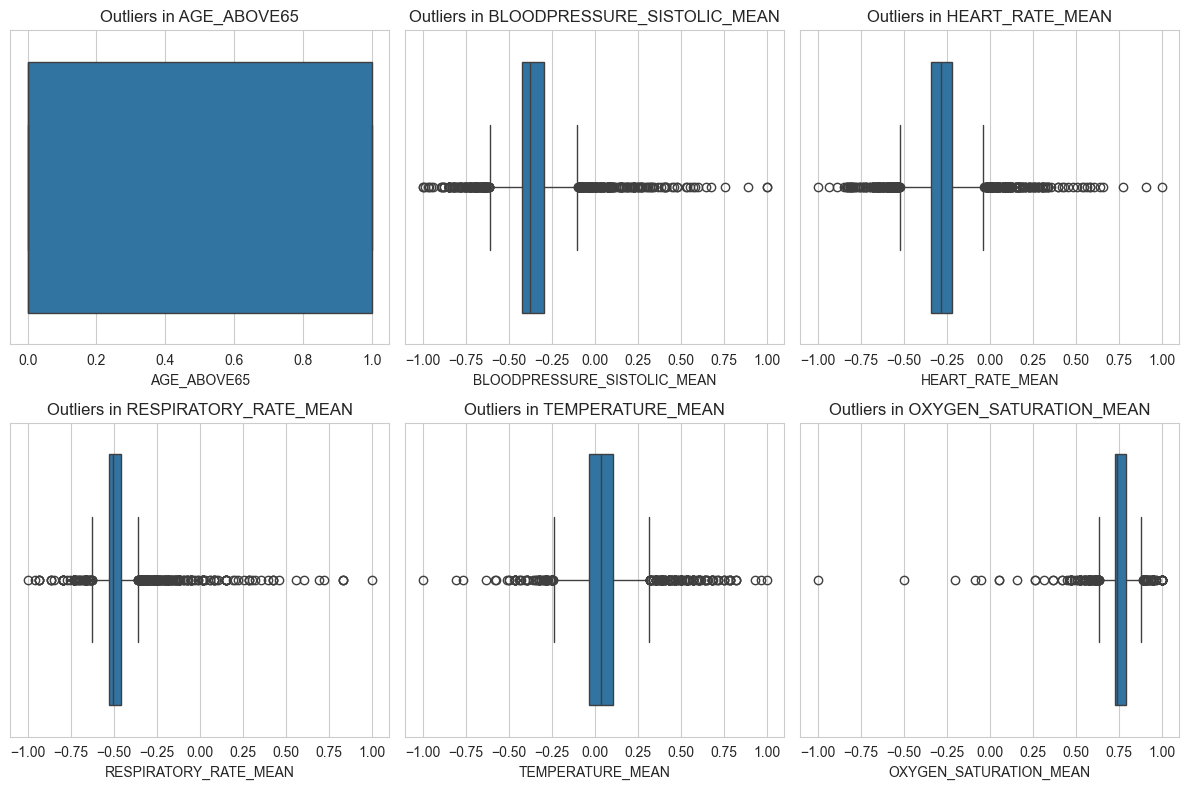

In [107]:
# Visualize outliers in key numerical columns
numerical_columns = [
    'AGE_ABOVE65', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
    'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN'
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


# I decided to not handle the outliers because the results may be correct but too high or too low because of the desease.


In [14]:
# Check for duplicate rows and print them out
duplicates = df[df.duplicated()]
print(duplicates)

# No duplicates 
# Now I'm going to perform exploratory data analysis (EDA) before scaling the data.

Empty DataFrame
Columns: [PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, ALBUMIN_MAX, ALBUMIN_DIFF, BE_ARTERIAL_MEDIAN, BE_ARTERIAL_MEAN, BE_ARTERIAL_MIN, BE_ARTERIAL_MAX, BE_ARTERIAL_DIFF, BE_VENOUS_MEDIAN, BE_VENOUS_MEAN, BE_VENOUS_MIN, BE_VENOUS_MAX, BE_VENOUS_DIFF, BIC_ARTERIAL_MEDIAN, BIC_ARTERIAL_MEAN, BIC_ARTERIAL_MIN, BIC_ARTERIAL_MAX, BIC_ARTERIAL_DIFF, BIC_VENOUS_MEDIAN, BIC_VENOUS_MEAN, BIC_VENOUS_MIN, BIC_VENOUS_MAX, BIC_VENOUS_DIFF, BILLIRUBIN_MEDIAN, BILLIRUBIN_MEAN, BILLIRUBIN_MIN, BILLIRUBIN_MAX, BILLIRUBIN_DIFF, BLAST_MEDIAN, BLAST_MEAN, BLAST_MIN, BLAST_MAX, BLAST_DIFF, CALCIUM_MEDIAN, CALCIUM_MEAN, CALCIUM_MIN, CALCIUM_MAX, CALCIUM_DIFF, CREATININ_MEDIAN, CREATININ_MEAN, CREATININ_MIN, CREATININ_MAX, CREATININ_DIFF, FFA_MEDIAN, FFA_MEAN, FFA_MIN, FFA_MAX, FFA_DI

In [108]:
print(df_cleaned.head())
print(df_cleaned.info())

#Here I investigated because I had issues with the plots not displaying. Kernel restarted, reduced the number of columns, 
#the layout was adjusted using plt.subplot() and plt.tight_layout() was used to ensure the subplots didn't overlap in the plots below. 


   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2 

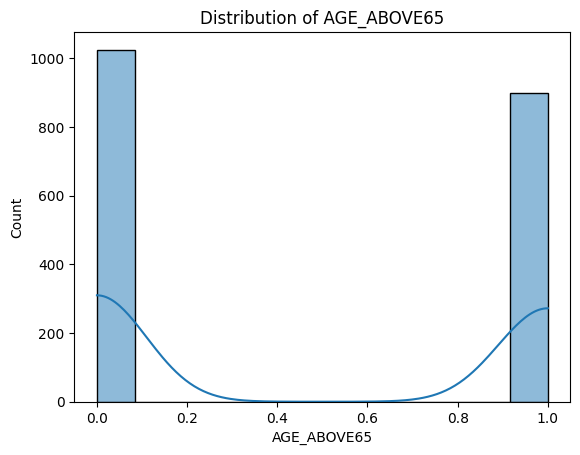

In [36]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Plot distribution for a single numerical column (e.g., 'AGE_ABOVE65')
# This step is useful for exploring the distribution of one feature at a time.

sns.histplot(df_cleaned['AGE_ABOVE65'], kde=True)  #Histogram of 'AGE_ABOVE65' and overlays a KDE (Kernel Density Estimate) curve

plt.title('Distribution of AGE_ABOVE65')

plt.show()  



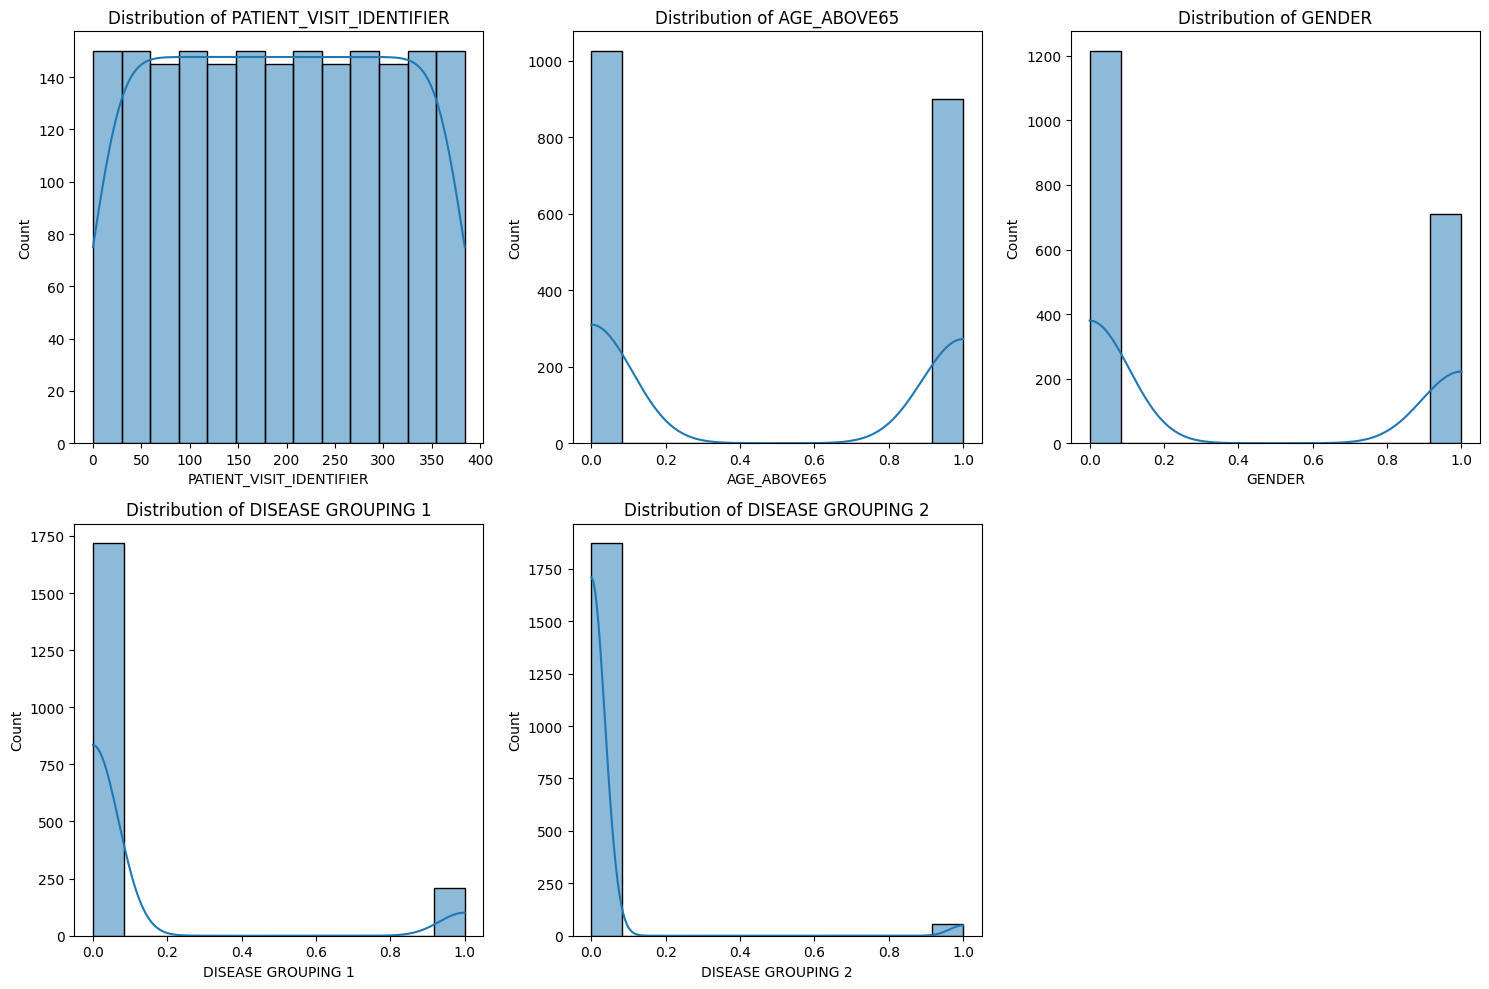

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected numerical columns (those with data types 'float64' and 'int64')
# I'm interested in numerical columns because the histograms and KDE plots are used to visualize distributions of numerical data.
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns[:5]  # Limit to the first 5 columns

plt.figure(figsize=(15, 10))

# Loop through the numerical columns and plot the distributions
# I loop through each numerical column, create a subplot for each one, and plot its histogram and KDE.
for i, col in enumerate(numerical_columns, 1):
    
    #Created subplots using plt.subplot(row, column, index)
    # The number of rows and columns determines the grid layout for the subplots.
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i (starts at 1)

    # Plot the histogram with a Kernel Density Estimate (KDE) for each column
    # The 'sns.histplot()' function creates a histogram, and setting 'kde=True'.
    sns.histplot(df_cleaned[col], kde=True)

    plt.title(f'Distribution of {col}')

    # 'plt.tight_layout()' adjusts the spacing between subplots so that the plot titles, axes, and labels don't overlap.
    plt.tight_layout()

plt.show()


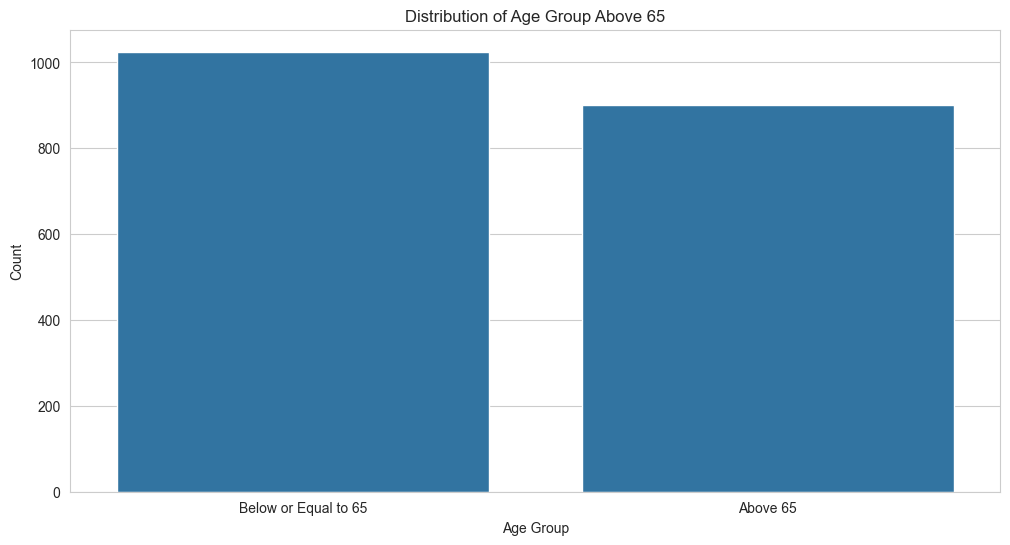

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6)) 
sns.set_style('whitegrid')  # Set the style to 'whitegrid' for a cleaner look

# Create the countplot
sns.countplot(data=df_cleaned, x='AGE_ABOVE65')

plt.title('Distribution of Age Group Above 65')
plt.xlabel('Age Group')  
plt.ylabel('Count')

plt.xticks([0, 1], ['Below or Equal to 65', 'Above 65'])  

plt.show()



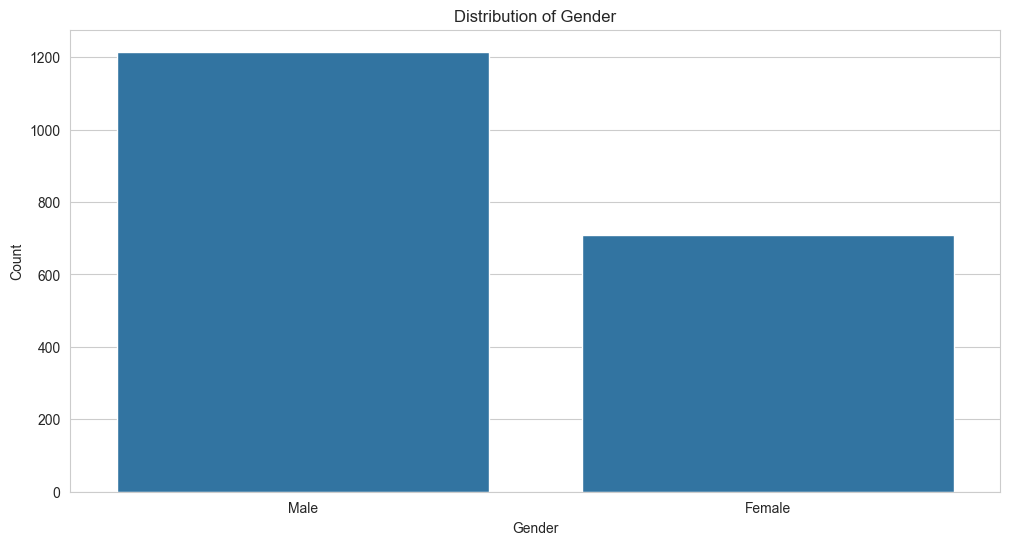

In [38]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

df_cleaned['GENDER'] = df_cleaned['GENDER'].map({0: 'Male', 1: 'Female'})

sns.countplot(data=df_cleaned, x='GENDER')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


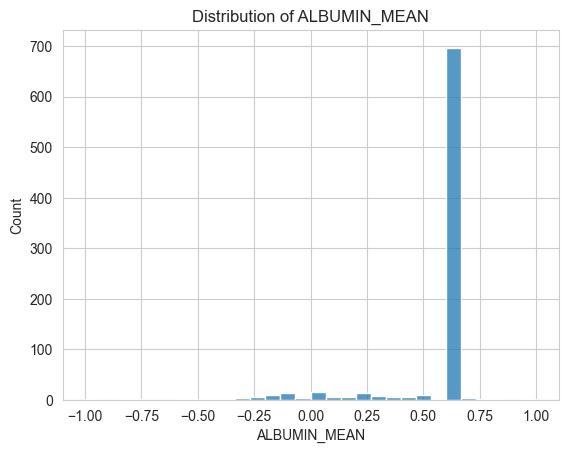

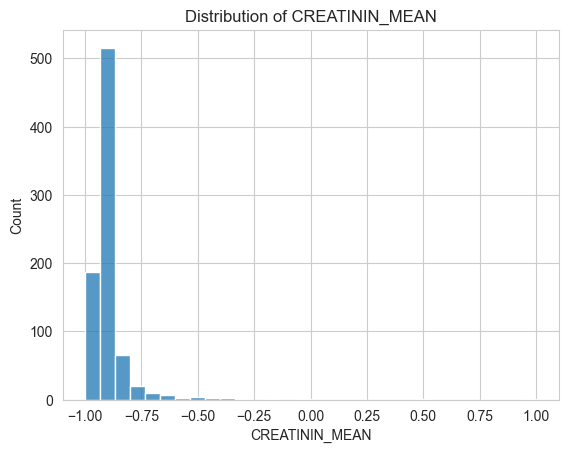

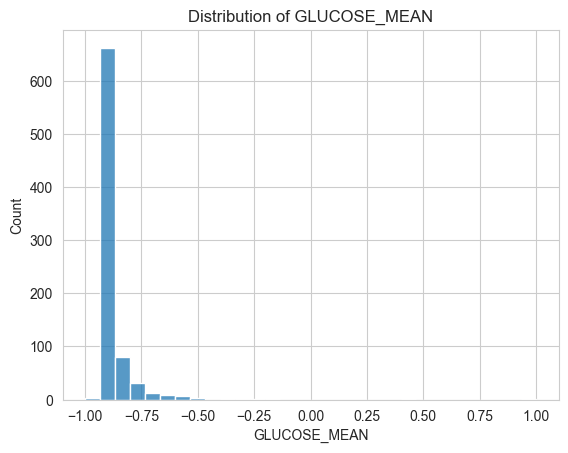

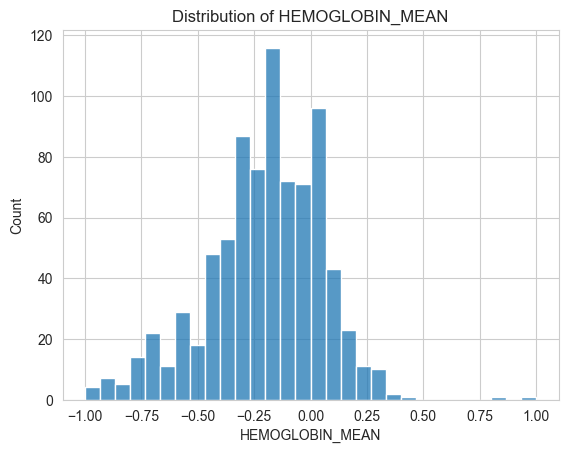

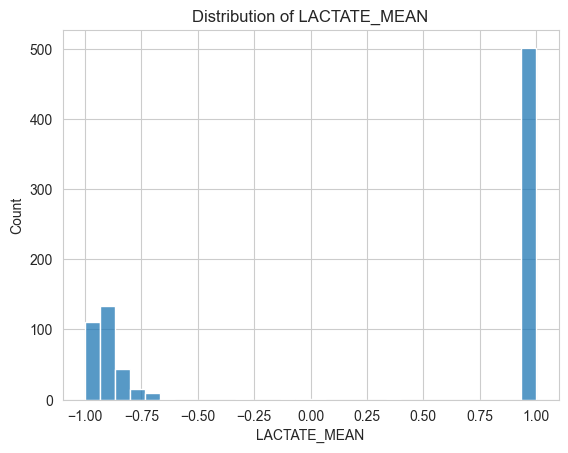

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of key health metrics columns to plot
health_metrics = ['ALBUMIN_MEAN', 'CREATININ_MEAN', 'GLUCOSE_MEAN', 'HEMOGLOBIN_MEAN', 'LACTATE_MEAN']

# Loop through each metric in the health_metrics list to generate individual histograms
for metric in health_metrics:
    # Create a histogram for the current health metric
    # 'sns.histplot()' creates the plot, 'bins=30' specifies the number of bins in the histogram
    sns.histplot(data=df, x=metric, bins=30)
    
    plt.title(f'Distribution of {metric}')

    plt.xlabel(metric)

    plt.ylabel('Count')

    plt.show()



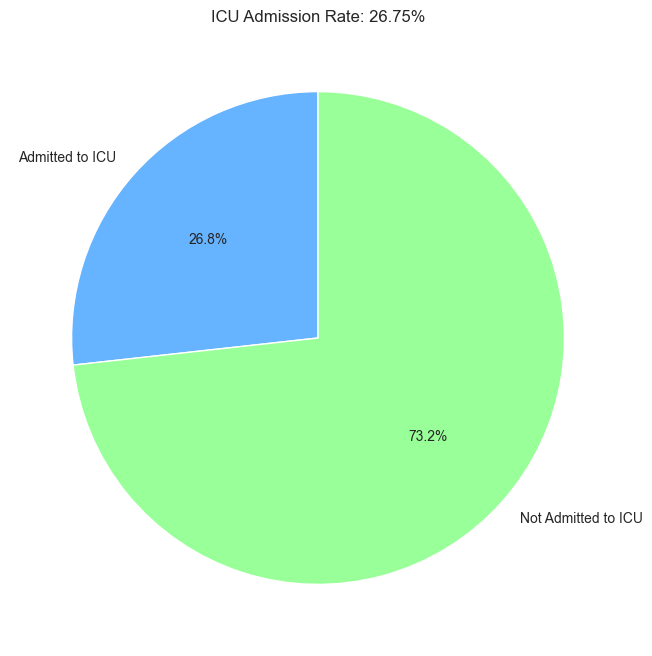

In [42]:
import matplotlib.pyplot as plt

# Calculate ICU admission rate
icu_admission_rate = df['ICU'].mean() * 100
non_icu_rate = 100 - icu_admission_rate

labels = ['Admitted to ICU', 'Not Admitted to ICU']
values = [icu_admission_rate, non_icu_rate]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title(f'ICU Admission Rate: {icu_admission_rate:.2f}%')
plt.show()


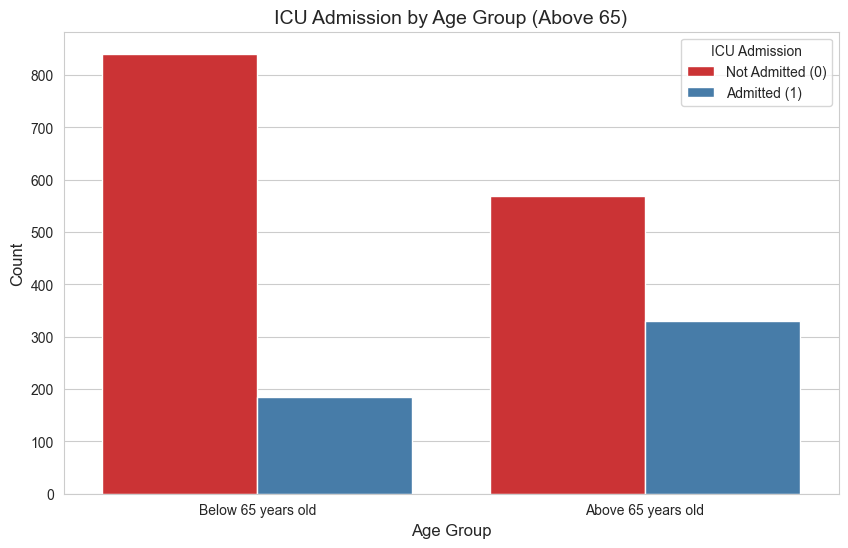

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a countplot showing ICU admission by Age group (AGE_ABOVE65)
sns.countplot(data=df_cleaned, x='AGE_ABOVE65', hue='ICU', palette='Set1')

plt.xticks(ticks=[0, 1], labels=['Below 65 years old', 'Above 65 years old'])

plt.title('ICU Admission by Age Group (Above 65)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()









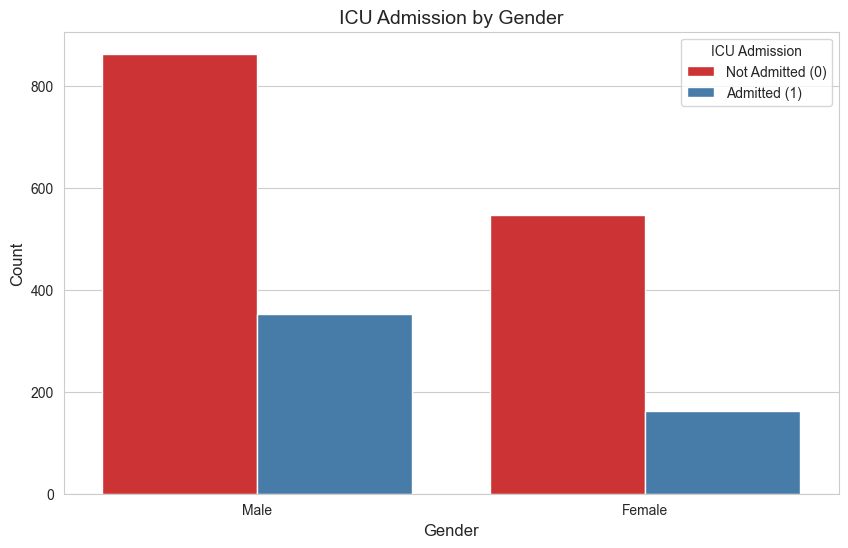

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a countplot showing ICU admission by Gender
sns.countplot(data=df_cleaned, x='GENDER', hue='ICU', palette='Set1')

plt.title('ICU Admission by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()


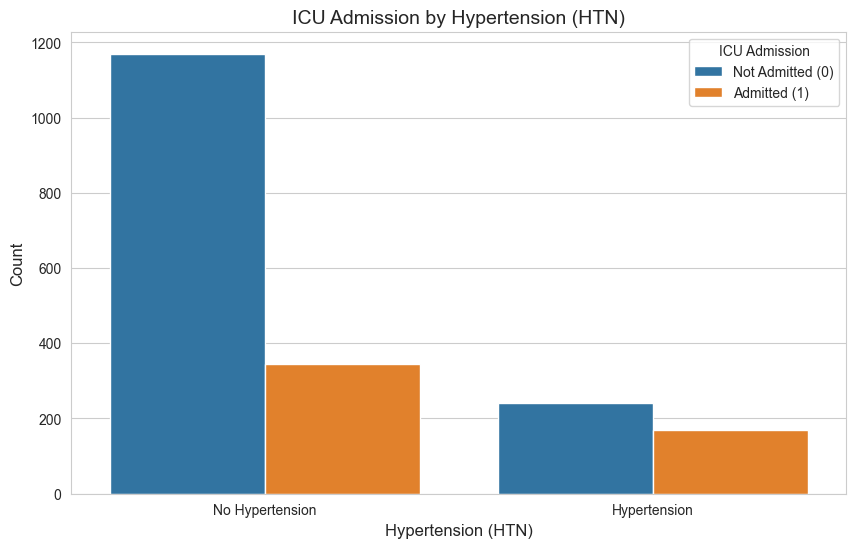

In [55]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='HTN', hue='ICU')

plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])

plt.title('ICU Admission by Hypertension (HTN)', fontsize=14)
plt.xlabel('Hypertension (HTN)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()




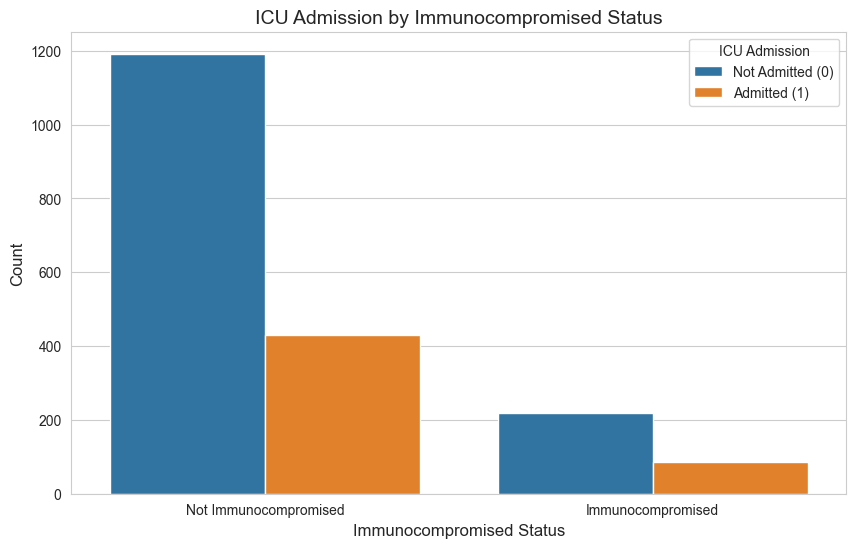

In [54]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='IMMUNOCOMPROMISED', hue='ICU')

plt.xticks(ticks=[0, 1], labels=['Not Immunocompromised', 'Immunocompromised'])

plt.title('ICU Admission by Immunocompromised Status', fontsize=14)
plt.xlabel('Immunocompromised Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()


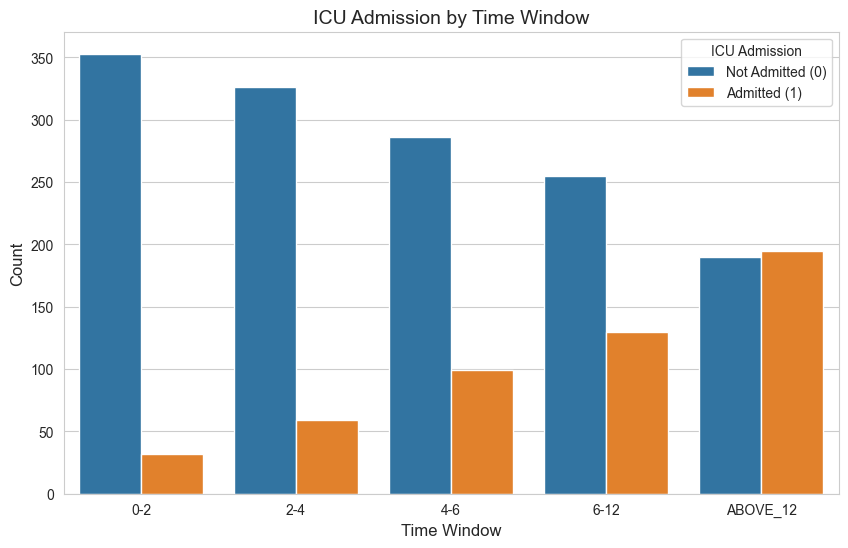

In [56]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='WINDOW', hue='ICU')

plt.title('ICU Admission by Time Window', fontsize=14)
plt.xlabel('Time Window', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()

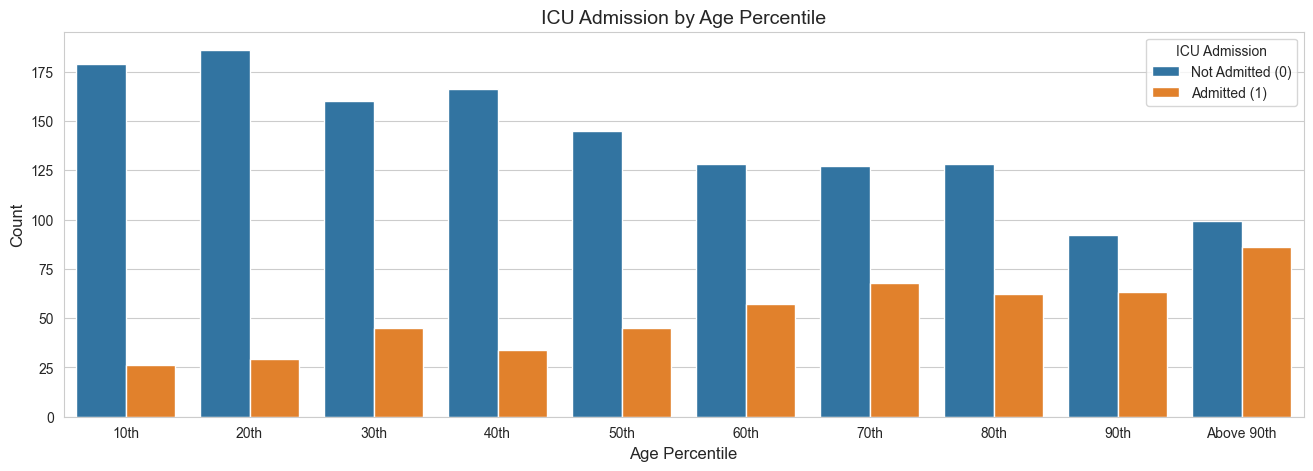

In [63]:
plt.figure(figsize=(16, 5))

# Define the order of age percentiles based on your dataset
age_order = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th']

# Create a countplot showing ICU admission by AGE_PERCENTIL
sns.countplot(x='AGE_PERCENTIL', hue='ICU', data=df_cleaned, order=age_order)

plt.title('ICU Admission by Age Percentile', fontsize=14)
plt.xlabel('Age Percentile', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])

plt.show()


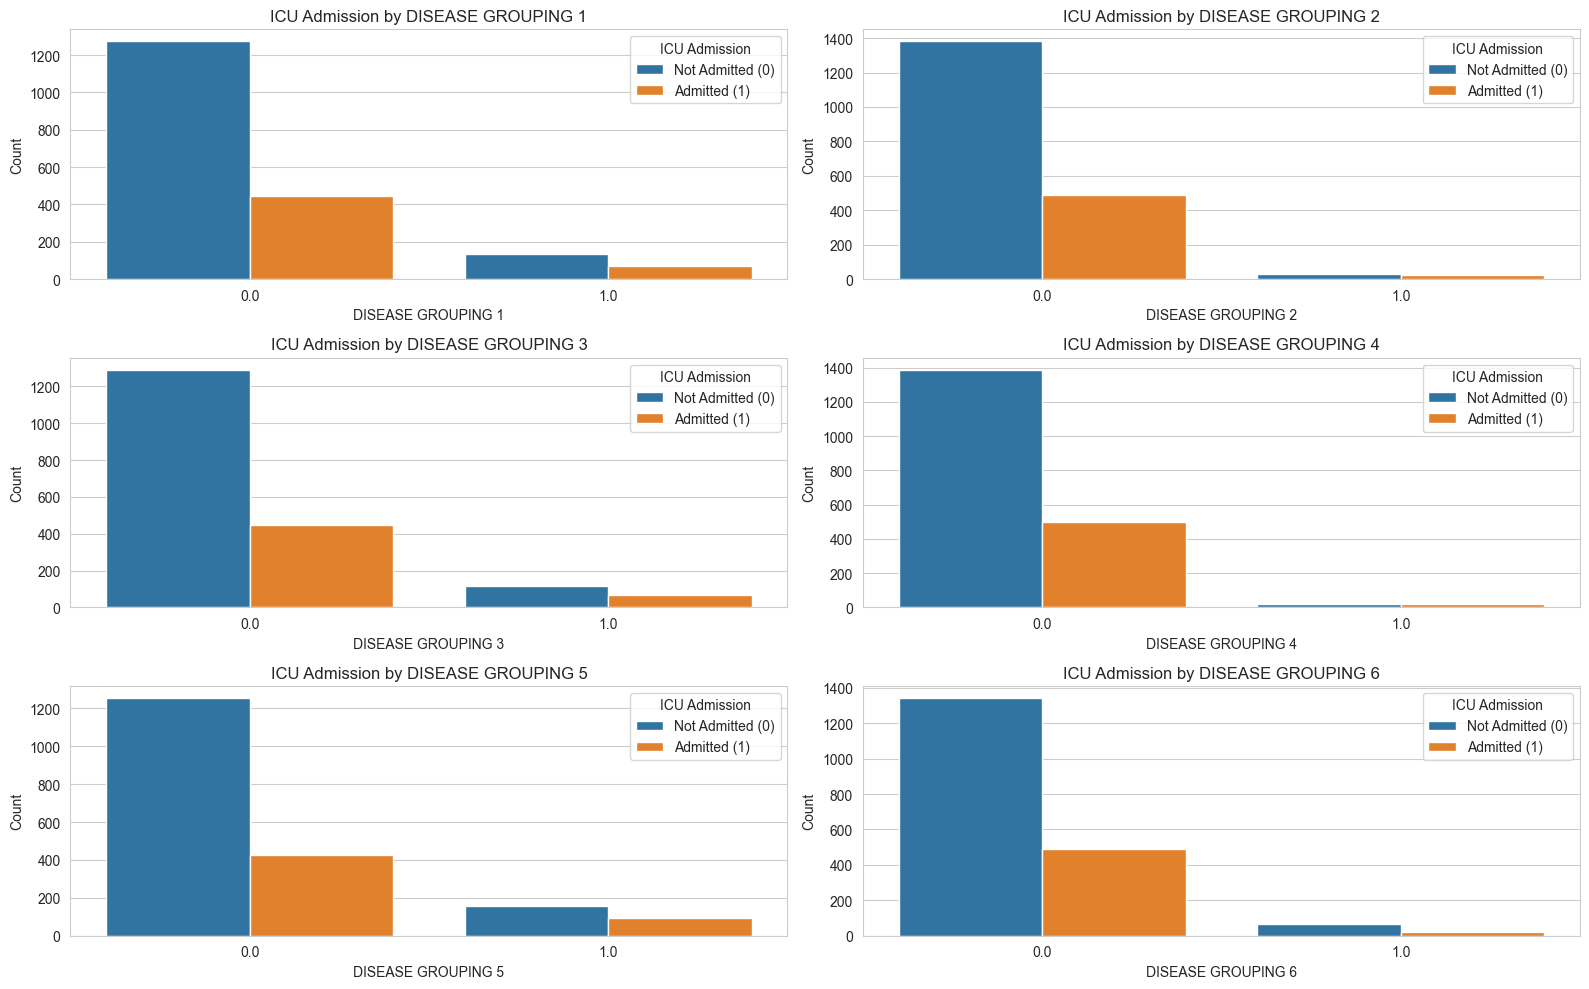

In [70]:
disease_groupings = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
                     'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

# Create a 3x2 grid for subplots
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 10))

# Loop through each disease grouping and create a countplot for ICU admission by disease status
i = 0
for feature in disease_groupings:
    sns.countplot(x=feature, hue='ICU', data=df_cleaned, ax=axes[i//2, i%2])  # Use integer division for rows and modulus for columns
    axes[i//2, i%2].set_title(f'ICU Admission by {feature}')  
    axes[i//2, i%2].set_xlabel(feature)  
    axes[i//2, i%2].set_ylabel('Count') 
   
    axes[i//2, i%2].legend(title='Disease Status', labels=['No Disease (0)', 'Has Disease (1)'])
  
    axes[i//2, i%2].legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'], loc='upper right') 
    
    i += 1

# Adjust layout for better spacing
plt.tight_layout()

plt.show()




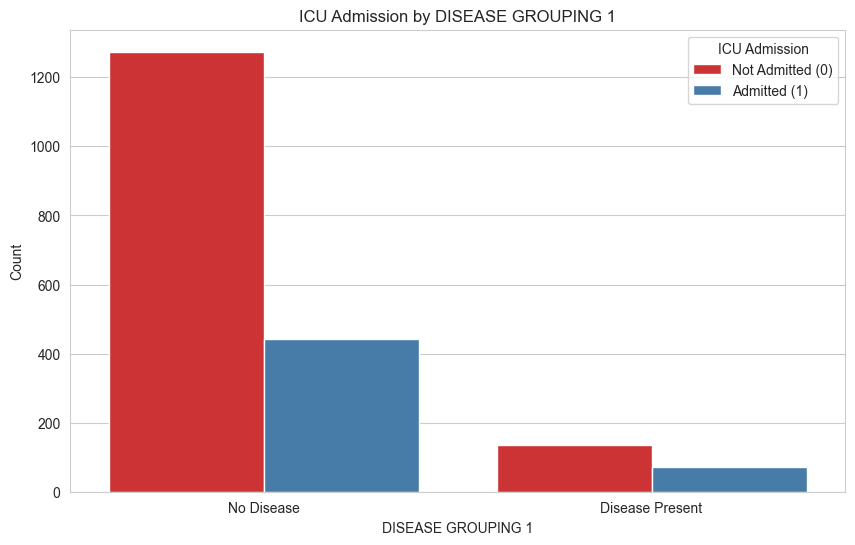

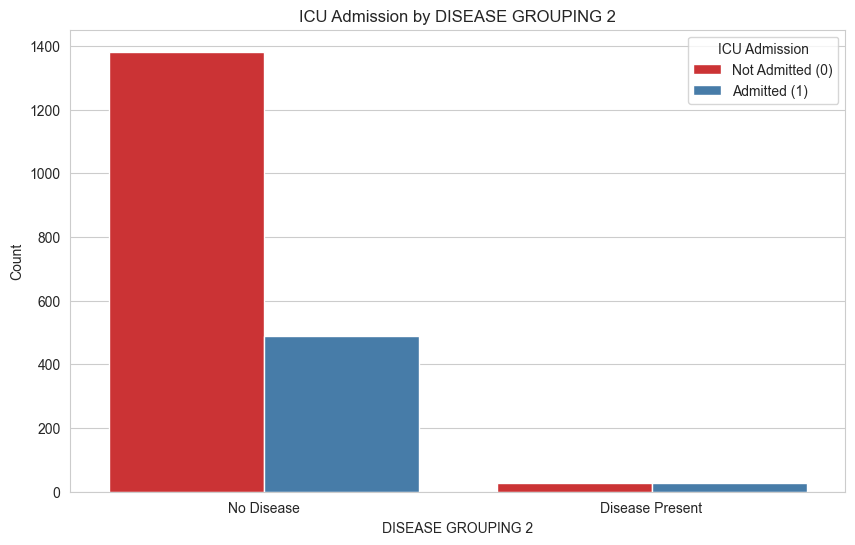

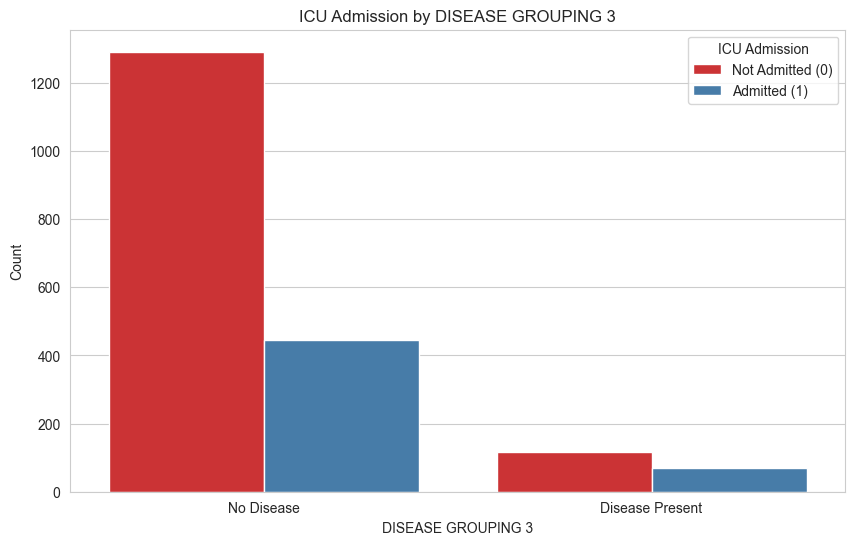

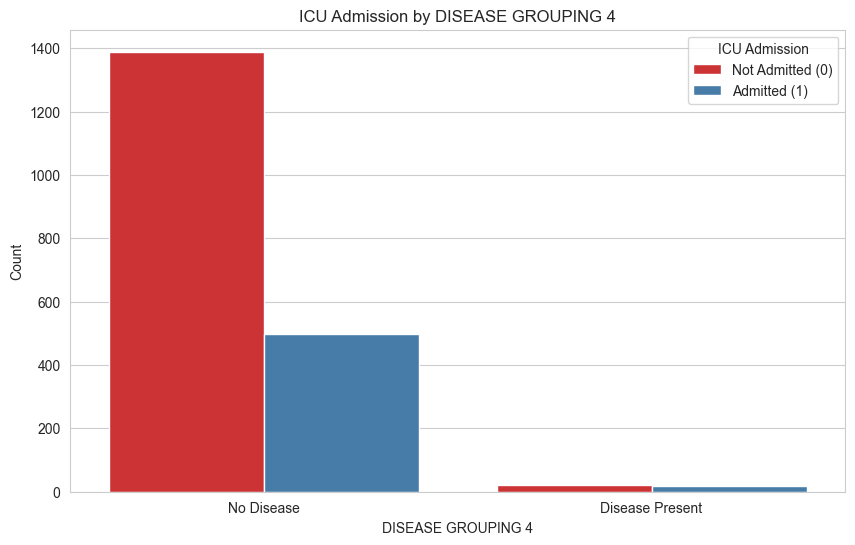

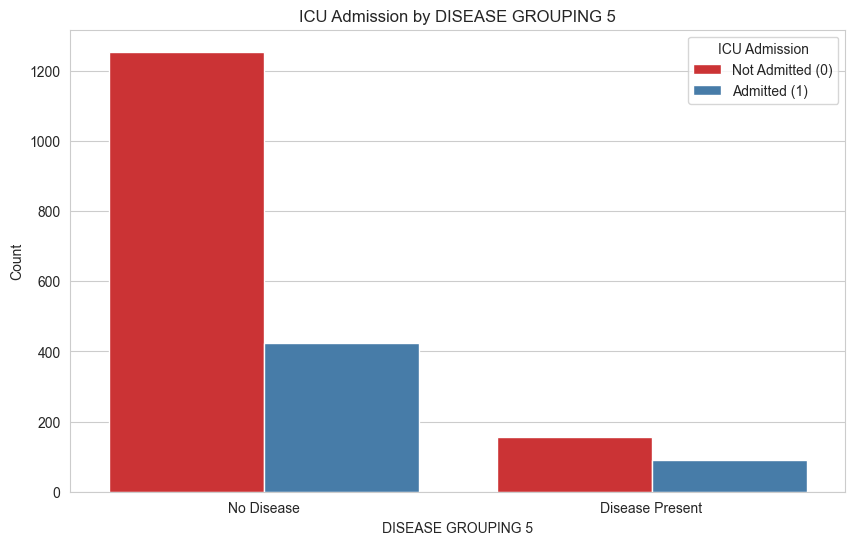

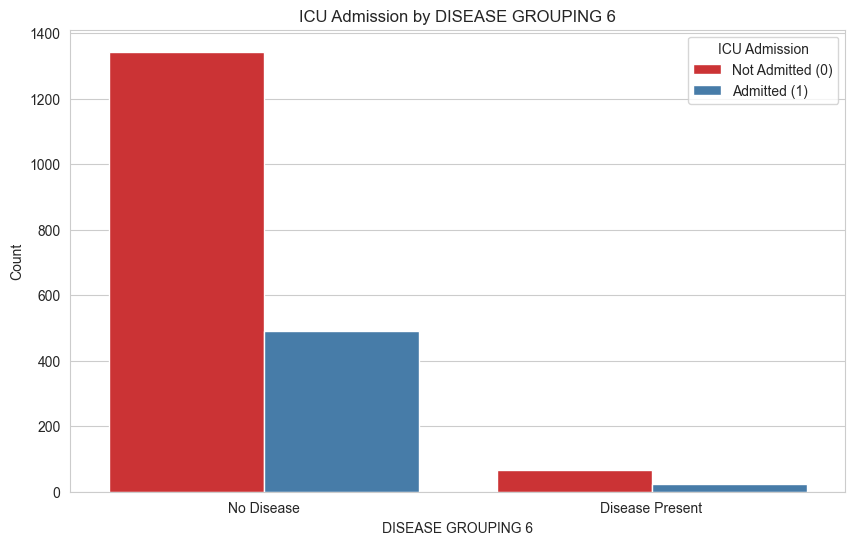

In [59]:

disease_groupings = [col for col in df_cleaned.columns if 'DISEASE GROUPING' in col]

# Loop through each disease grouping column
for grouping in disease_groupings:
    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=df_cleaned, x=grouping, hue='ICU', palette='Set1')  # Count plot for each disease grouping with ICU as hue
    plt.title(f'ICU Admission by {grouping}')  
    plt.xlabel(grouping) 
    plt.ylabel('Count')  
    
    plt.legend(title='ICU Admission', labels=['Not Admitted (0)', 'Admitted (1)'])
    
    plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease Present'])  
    
    plt.show()  




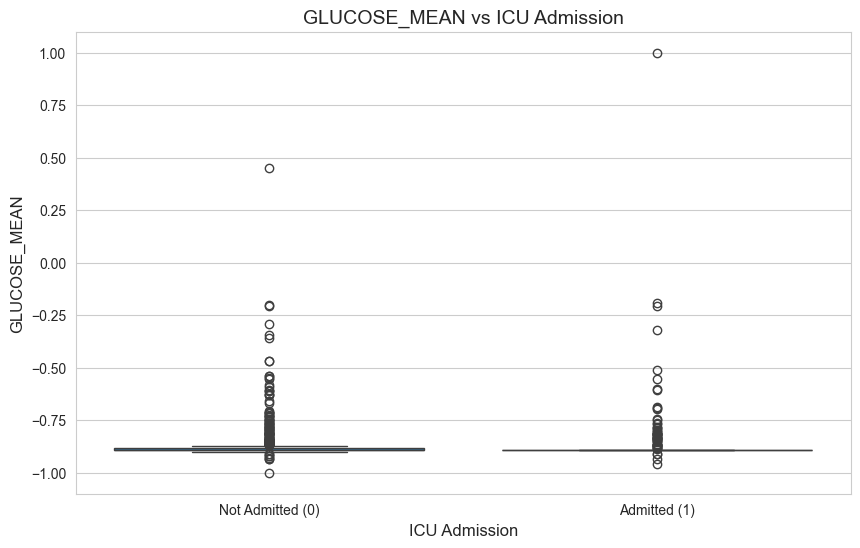

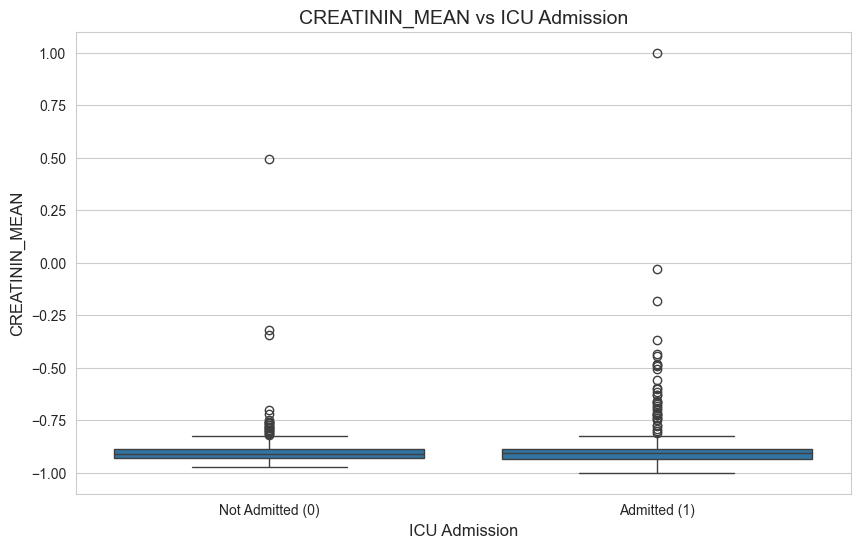

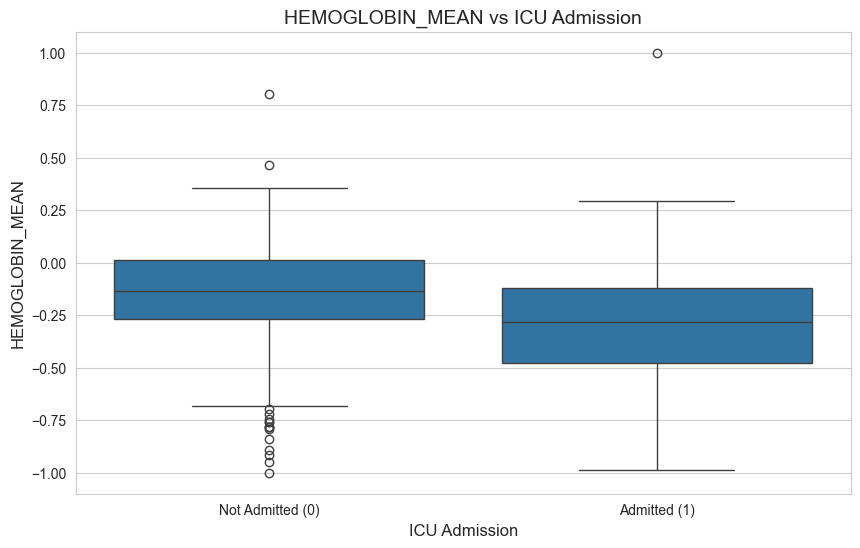

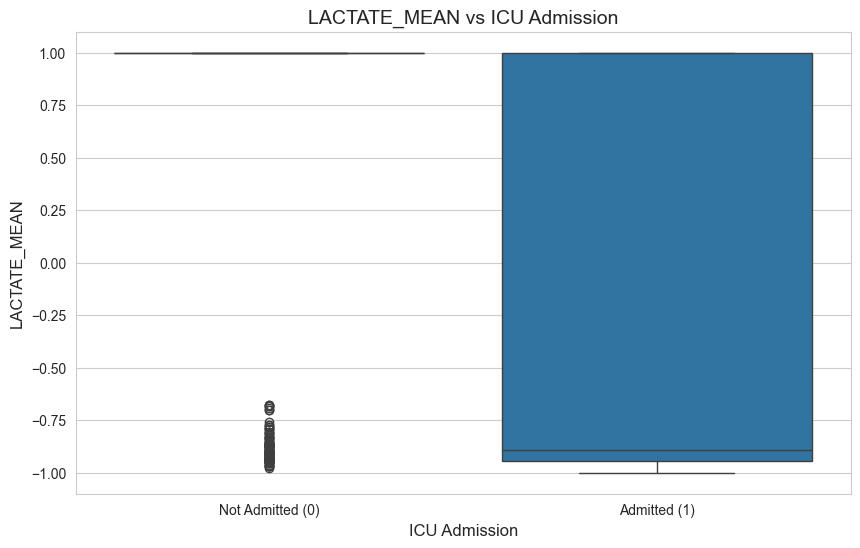

In [62]:
health_metrics = ['GLUCOSE_MEAN', 'CREATININ_MEAN', 'HEMOGLOBIN_MEAN', 'LACTATE_MEAN']

# Iterate over each health metric and create a boxplot
for metric in health_metrics:
    plt.figure(figsize=(10, 6))
    
    # Create boxplot for the metric against ICU admission status
    sns.boxplot(data=df, x='ICU', y=metric)

    plt.title(f'{metric} vs ICU Admission', fontsize=14)
    plt.xlabel('ICU Admission', fontsize=12)
    plt.ylabel(metric, fontsize=12)
 
    plt.xticks(ticks=[0, 1], labels=['Not Admitted (0)', 'Admitted (1)'])
    
    plt.show()


In [110]:
# Check unique values in the target column (ICU)
print(y_train.unique())



[ 1.65464923 -0.6043577 ]


In [113]:
# Binarize the target variable based on the threshold
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

# Check the unique values in y_train
print(y_train.unique())


[1 0]


Accuracy: 0.8208
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       278
           1       0.74      0.54      0.63       107

    accuracy                           0.82       385
   macro avg       0.79      0.74      0.75       385
weighted avg       0.81      0.82      0.81       385

Confusion Matrix:
[[258  20]
 [ 49  58]]


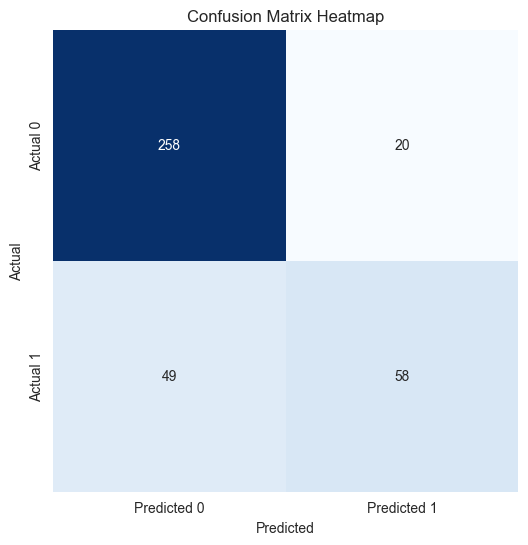

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Baseline Model
# Evaluate the model's performance on the test set

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap 
import matplotlib.pyplot as plt

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'], cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
